In [1]:
# Import libraries
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats
import seaborn as sns
import jenkspy
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load CSVs
order_list_path = Path('Resources/ListofOrders.csv')
order_details_path = Path('Resources/OrderDetails.csv')
sales_target_path = Path('Resources/SalesTarget.csv')
order_list_df = pd.read_csv(order_list_path)
order_details_df = pd.read_csv(order_details_path)
sales_target_df = pd.read_csv(sales_target_path)

In [3]:
# Check head
order_list_df.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [4]:
# Check head
order_details_df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [5]:
# Check head
sales_target_df.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


In [6]:
# Check shapes
print(order_list_df.shape)
print(order_details_df.shape)
print(sales_target_df.shape)

(560, 5)
(1500, 6)
(36, 3)


In [7]:
# Merge order_list and order_details DataFrames
orders_df = pd.merge(order_list_df, order_details_df, on='Order ID')

In [8]:
# Check head
orders_df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


In [9]:
# Check summary stats
orders_df.describe()

,Amount,Profit,Quantity
count,1500.000000,1500.000000,1500.000000
mean,287.668000,15.970000,3.743333
std,461.050488,169.140565,2.184942
min,4.000000,-1981.000000,1.000000
25%,45.000000,-9.250000,2.000000
50%,118.000000,9.000000,3.000000
75%,322.000000,38.000000,5.000000
max,5729.000000,1698.000000,14.000000


In [10]:
# Set datetime
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'])

In [11]:
# Check date max
orders_df['Order Date'].max()

Timestamp('2019-12-03 00:00:00')

In [12]:
# Check date min
orders_df['Order Date'].min()

Timestamp('2018-01-04 00:00:00')

In [13]:
# Sort by Order Date
orders_df.sort_values(by='Order Date', inplace=True, ascending=True)

In [14]:
# Che ck Date
orders_df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,2018-01-04,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


In [15]:
# Check nulls
orders_df.isnull().sum()

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

In [16]:
# Check duplicates
orders_df.duplicated().sum()

0

In [17]:
# Prepare RFM Analysis (Recency, Frequency and Monetization)
# Set anchor date and rfm DataFrame
anchor_date = dt.datetime(2019,12,4)
rfm = orders_df.groupby('CustomerName').agg({'Order Date': lambda x: (anchor_date - x.max()).days, 
                                            'Order ID': lambda x: len(x), 
                                            'Amount': lambda x: x.sum()
                                            }
                                            )

In [18]:
# Check head
rfm.head()

,Order Date,Order ID,Amount
CustomerName,,,
Aakanksha,696,2,74.0
Aarushi,257,12,4701.0
Aashna,601,7,1931.0
Aastha,404,6,3276.0
Aayush,384,6,556.0


In [19]:
# Rename Columns
rfm.columns = ['Recency', 'Frequency', 'Monetization']

In [20]:
# Check head
rfm.head()

,Recency,Frequency,Monetization
CustomerName,,,
Aakanksha,696,2,74.0
Aarushi,257,12,4701.0
Aashna,601,7,1931.0
Aastha,404,6,3276.0
Aayush,384,6,556.0


In [21]:
# Obtain percentiles and quartiles
rfm['r_percentile'] = rfm['Recency'].rank(method='first', pct=True, ascending=False)
rfm['r_score'] = pd.qcut(rfm['r_percentile'], 4, labels=range(4, 0, -1))
rfm['f_percentile'] = rfm['Frequency'].rank(method='first', pct=True, ascending=True)
rfm['f_score'] = pd.qcut(rfm['f_percentile'], 4, labels=range(4, 0, -1))
rfm['m_percentile'] = rfm['Monetization'].rank(method='first', pct=True, ascending=True)
rfm['m_score'] = pd.qcut(rfm['m_percentile'], 4, labels=range(4, 0, -1))

In [22]:
# Check head
rfm.head()

,Recency,Frequency,Monetization,r_percentile,r_score,f_percentile,f_score,m_percentile,m_score
CustomerName,,,,,,,,,
Aakanksha,696,2,74.0,0.006024,4,0.325301,3,0.108434,4
Aarushi,257,12,4701.0,0.798193,1,0.930723,1,0.945783,1
Aashna,601,7,1931.0,0.078313,4,0.768072,1,0.786145,1
Aastha,404,6,3276.0,0.406627,3,0.692771,2,0.888554,1
Aayush,384,6,556.0,0.460843,3,0.695783,2,0.445783,3


In [23]:
# Concatenate scores to new column
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)

In [24]:
# Check head
rfm.head()

,Recency,Frequency,Monetization,r_percentile,r_score,f_percentile,f_score,m_percentile,m_score,rfm_score
CustomerName,,,,,,,,,,
Aakanksha,696,2,74.0,0.006024,4,0.325301,3,0.108434,4,434
Aarushi,257,12,4701.0,0.798193,1,0.930723,1,0.945783,1,111
Aashna,601,7,1931.0,0.078313,4,0.768072,1,0.786145,1,411
Aastha,404,6,3276.0,0.406627,3,0.692771,2,0.888554,1,321
Aayush,384,6,556.0,0.460843,3,0.695783,2,0.445783,3,323


<function matplotlib.pyplot.show(close=None, block=None)>

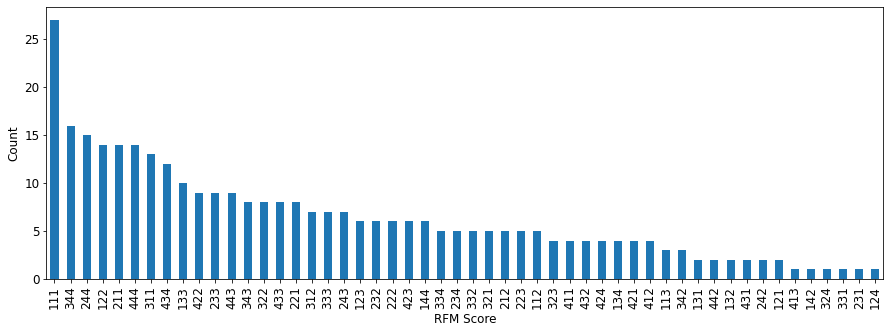

In [25]:
# Plot RFM score counts
rfm_plot = rfm['rfm_score'].value_counts().plot(kind='bar', figsize=(15, 5), fontsize=12)
rfm_plot.set_xlabel('RFM Score', fontsize=12)
rfm_plot.set_ylabel('Count', fontsize=12)
plt.show

In [26]:
# Check where values are partiioned on
r_quarters = rfm['Recency'].quantile(q=[0.0, 0.25, 0.5, 0.75, 1]).to_list()
f_quarters = rfm['Frequency'].quantile(q=[0.0, 0.25, 0.5, 0.75, 1]).to_list()
m_quarters = rfm['Monetization'].quantile(q=[0.0, 0.25, 0.5, 0.75, 1]).to_list()
quartile_spread = pd.DataFrame(list(zip(r_quarters, f_quarters, m_quarters)), columns = ['Q_Recency', 'Q_Frequency', 'Q_Monetization'], index=['min', 'first_part', 'second_part', 'third_part', 'max'])
quartile_spread

,Q_Recency,Q_Frequency,Q_Monetization
min,1.00,1.0,11.0
first_part,265.75,1.0,178.5
second_part,375.00,3.0,764.5
third_part,477.50,6.0,1716.5
max,697.00,25.0,9177.0


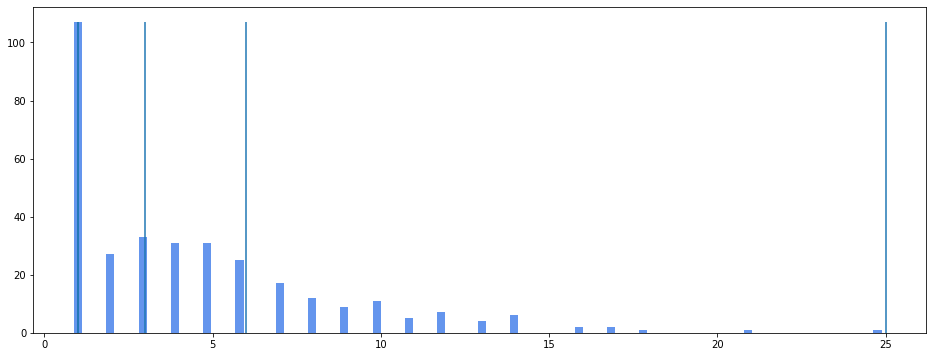

In [27]:
# Plot histogram to visualize frequency partitions
plt.figure(figsize = (16, 6))
hist = plt.hist(rfm['Frequency'], bins=100, align='left', color='cornflowerblue')
for q in f_quarters:
    plt.vlines(q, ymin=0, ymax=max(hist[0]))

In [28]:
# Partition with Jenks
r_breaks = jenkspy.jenks_breaks(rfm['Recency'], nb_class=4)
f_breaks = jenkspy.jenks_breaks(rfm['Frequency'], nb_class=4)
m_breaks = jenkspy.jenks_breaks(rfm['Monetization'], nb_class=4)
jenks_spread = pd.DataFrame(list(zip(r_breaks, f_breaks, m_breaks)), columns=['J_Recency', 'J_Frequency', 'J_Monetization'], index = ['min', 'first_part', 'second_part', 'third_part', 'max'])
jenks_spread

,J_Recency,J_Frequency,J_Monetization
min,1.0,1.0,11.0
first_part,156.0,3.0,944.0
second_part,342.0,7.0,2584.0
third_part,484.0,12.0,4929.0
max,697.0,25.0,9177.0


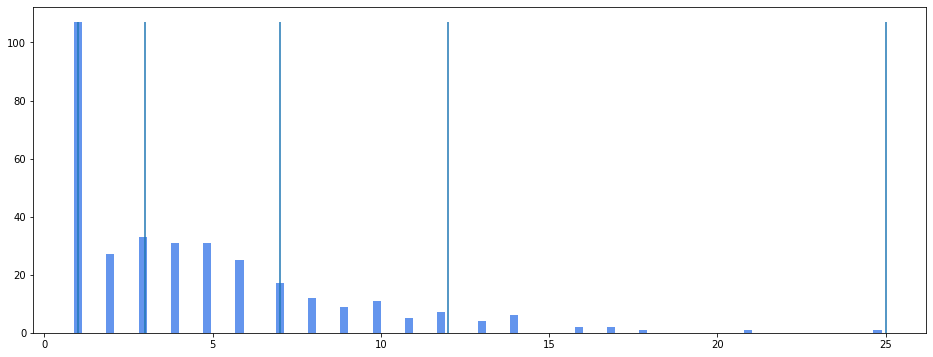

In [29]:
# Plot histogram to visualize Jenks partitions
plt.figure(figsize = (16, 6))
hist = plt.hist(rfm['Frequency'], bins=100, align='left', color='cornflowerblue')
for q in f_breaks:
    plt.vlines(q, ymin=0, ymax=max(hist[0]))

In [30]:
# Compare spreads
spreads_df = pd.concat([quartile_spread, jenks_spread], axis=1)
cols = ['Q_Recency', 'J_Recency', 'Q_Frequency', 'J_Frequency', 'Q_Monetization', 'J_Monetization']
spreads_df[cols]

,Q_Recency,J_Recency,Q_Frequency,J_Frequency,Q_Monetization,J_Monetization
min,1.00,1.0,1.0,1.0,11.0,11.0
first_part,265.75,156.0,1.0,3.0,178.5,944.0
second_part,375.00,342.0,3.0,7.0,764.5,2584.0
third_part,477.50,484.0,6.0,12.0,1716.5,4929.0
max,697.00,697.0,25.0,25.0,9177.0,9177.0


In [31]:
# Check goodness of variance of fit
# Crediting camdenl with this function - https://stats.stackexchange.com/users/27263/camdenl?tab=profile
def goodness_of_variance_fit(array, classes):
    # get the break points
    classes = jenkspy.jenks_breaks(array, nb_class=classes)
# do the actual classification
    classified = np.array([classify(i, classes) for i in array])
# max value of zones
    maxz = max(classified)
# nested list of zone indices
    zone_indices = [[idx for idx, val in enumerate(classified) if zone + 1 == val] for zone in range(maxz)]
# sum of squared deviations from array mean
    sdam = np.sum((array - array.mean()) ** 2)
# sorted polygon stats
    array_sort = [np.array([array[index] for index in zone]) for zone in zone_indices]
# sum of squared deviations of class means
    sdcm = sum([np.sum((classified - classified.mean()) ** 2) for classified in array_sort])
# goodness of variance fit
    gvf = (sdam - sdcm) / sdam
    return gvf

def classify(value, breaks):
    for i in range(1, len(breaks)):
        if value < breaks[i]:
            return i
    return len(breaks) - 1

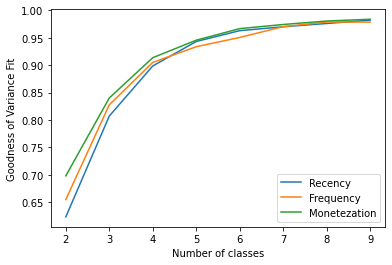

In [32]:
# Plot goodness of variance of fit
my_dict = {}
for col in rfm.columns[:3]:
    results = []
    for i in range(2, 10):
        results.append(goodness_of_variance_fit(rfm[col], i))
    my_dict[col] = results  
plt.plot(range(2, 10), my_dict['Recency'], label='Recency')
plt.plot(range(2, 10), my_dict['Frequency'], label='Frequency')
plt.plot(range(2, 10), my_dict['Monetization'], label='Monetezation')
plt.xlabel('Number of classes')
plt.ylabel('Goodness of Variance Fit')
plt.legend(loc='best')
plt.show()

In [33]:
breaks_list = [r_breaks, f_breaks, m_breaks]

rfm['r_j_score'] = pd.cut(rfm['Recency'], bins=r_breaks, labels=[1, 2, 3, 4], include_lowest=True)
rfm['f_j_score'] = pd.cut(rfm['Frequency'], bins=f_breaks, labels=[4, 3, 2, 1], include_lowest=True)
rfm['m_j_score'] = pd.cut(rfm['Monetization'], bins=m_breaks, labels=[4, 3, 2, 1], include_lowest=True)

rfm.drop(['r_percentile', 'f_percentile', 'm_percentile'], axis=1, inplace=True)

rfm['rfm_j_score'] = rfm['r_j_score'].astype(str) + rfm['f_j_score'].astype(str) + rfm['m_j_score'].astype(str)

In [34]:
rfm.head()

,Recency,Frequency,Monetization,r_score,f_score,m_score,rfm_score,r_j_score,f_j_score,m_j_score,rfm_j_score
CustomerName,,,,,,,,,,,
Aakanksha,696,2,74.0,4,3,4,434,4,4,4,444
Aarushi,257,12,4701.0,1,1,1,111,2,2,2,222
Aashna,601,7,1931.0,4,1,1,411,4,3,3,433
Aastha,404,6,3276.0,3,2,1,321,3,3,2,332
Aayush,384,6,556.0,3,2,3,323,3,3,4,334


<function matplotlib.pyplot.show(close=None, block=None)>

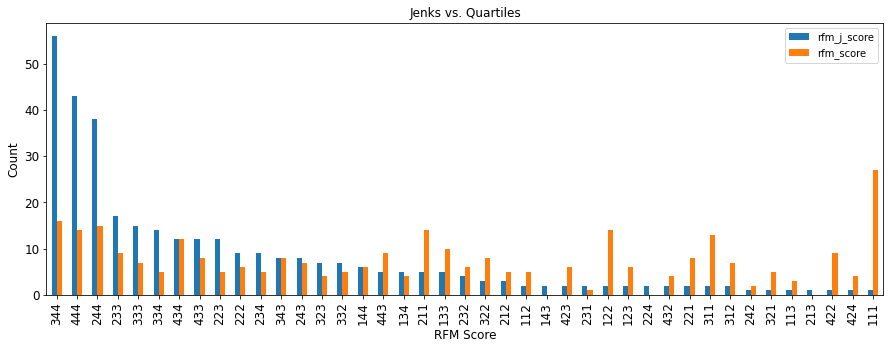

In [35]:
rfm_combo_df = rfm['rfm_j_score'].value_counts().to_frame().join(rfm['rfm_score'].value_counts())
combo_plot = rfm_combo_df.plot(kind='bar', title='Jenks vs. Quartiles', figsize=(15, 5), legend=True, fontsize=12)
combo_plot.set_xlabel('RFM Score', fontsize=12)
combo_plot.set_ylabel('Count', fontsize=12)
plt.show

In [51]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=5,min_samples=12, metric='euclidean')
clusterer.fit(rfm[['Recency', 'Frequency', 'Monetization']])
rfm['Cluster'] = pd.Series(clusterer.labels_, index=rfm.index)
rfm.head(3)

,Recency,Frequency,Monetization,r_score,f_score,m_score,rfm_score,r_j_score,f_j_score,m_j_score,rfm_j_score,Cluster
CustomerName,,,,,,,,,,,,
Aakanksha,696,2,74.0,4,3,4,434,4,4,4,444,1
Aarushi,257,12,4701.0,1,1,1,111,2,2,2,222,-1
Aashna,601,7,1931.0,4,1,1,411,4,3,3,433,1


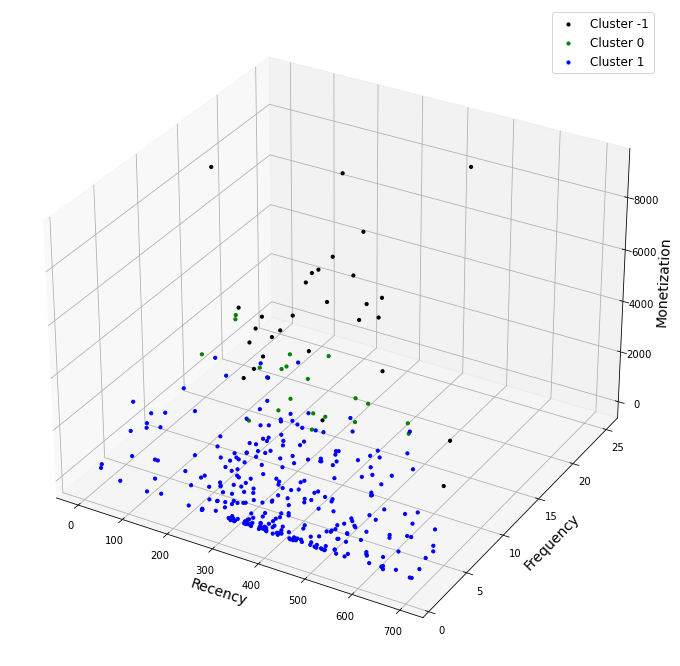

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
fig = plt.figure(figsize=(18,12))
dx = fig.add_subplot(111, projection='3d')
colors = ['green', 'blue', 'red', 'yellow', 'black']
#colors = [ k for k in mcolors.CSS4_COLORS ]
for i in range(-1,len(rfm['Cluster'].unique())-1):
    dx.scatter(rfm[rfm.Cluster == i].Recency, 
               rfm[rfm.Cluster == i].Frequency, 
               rfm[rfm.Cluster == i].Monetization, 
               c = colors[i], 
               label = 'Cluster ' + str(i), 
               s=10, alpha=1.0)
dx.set_xlabel('Recency', fontsize=14)
dx.set_ylabel('Frequency', fontsize=14)
dx.set_zlabel('Monetization', fontsize=14)
dx.legend(fontsize=12)

In [53]:
pd.Series(clusterer.labels_).value_counts()

 1    282
-1     30
 0     20
dtype: int64

In [54]:
myDict = {}
for i in range(0, len(rfm['Cluster'].unique())-1):
    clust = rfm[rfm['Cluster'] == i]
    myDict['Cluster ' + str(i)] = [int(round(clust['Recency'].mean(),0)),
                            int(round(clust['Frequency'].mean(),0)),
                            int(round(clust['Monetization'].mean(),0)),
                            int(round(clust['Recency'].median(),0)),
                            int(round(clust['Frequency'].median(),0)),
                            int(round(clust['Monetization'].median(),0))]
    
df = pd.DataFrame.from_dict(myDict, orient='index',
                            columns=['mean_Recency','mean_Frequency', 'mean_Monetization',
                                    'median_Recency','median_Frequency', 'median_Monetization'])
df

,mean_Recency,mean_Frequency,mean_Monetization,median_Recency,median_Frequency,median_Monetization
Cluster 0,343,8,3322,341,8,3282
Cluster 1,385,3,746,382,3,480


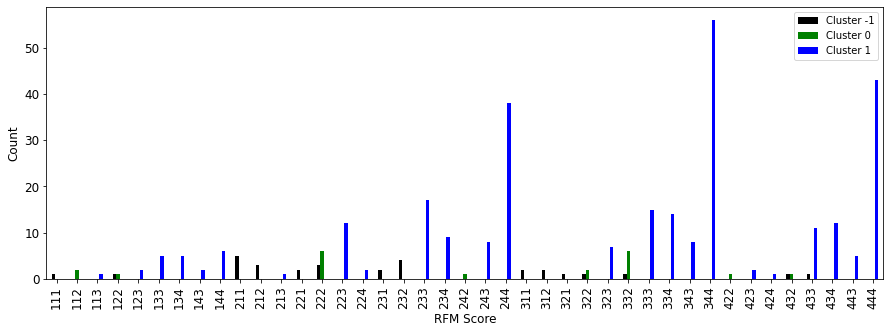

In [55]:
myDict = {}
for i in range(-1, len(rfm['Cluster'].unique())-1):
    clust = rfm[rfm['Cluster'] == i]
    myDict["Cluster " + str(i)] = clust['rfm_j_score'].value_counts()
df = pd.DataFrame.from_dict(myDict)
colors = ['black', 'green', 'blue', 'red', 'yellow']
ax = df.plot(kind='bar', figsize=(15, 5), legend=True, fontsize=12, color=colors)
ax.set_xlabel("RFM Score", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()